<a href="https://colab.research.google.com/github/amiable17/Deep_Learning/blob/master/study1/17_%EC%8B%9C%ED%80%80%EC%8A%A4%EB%B0%B0%EC%97%B4%EB%A1%9C_%EB%8B%A4%EB%A3%A8%EB%8A%94_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **모두의 딥러닝**
## 다섯째마당-딥러닝의 활용


### 17장 시퀀스 배열로 다루는 순환신경망(RNN)

* 순환신경망(Recurrent Neural Network, RNN)
>* 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법.  
>* 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 데이터로 넘어감.
>* LSTM(Long Short Term Memory): 반복되기 직전에 다음 층으로 기억된 값을 넘길지 안넘길지를 관리하는 단계를 하나 더 추가. RNN의 기울기 소실 문제를 보완한 방법.

* 참고 링크) [RNN과 LSTM](https://ratsgo.github.io/natural%20language%20processing/2017/03/09/rnnlstm/)

In [0]:
# LSTM을 이용한 로이터 뉴스 카테고리 분류하기
# seed 설정
import numpy as np
import tensorflow as tf
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [0]:
# num_words arg.의 의미: 빈도가 1~1000에 해당하는 단어만 선택해서 불러오는 것!!
# 데이터 확인
category = np.max(Y_train) + 1   # 0부터 세기 때문에 1을 더해서 출력.
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])   # 숫자의 의미: 데이터 안에서 해당 단어가 몇 번이나 나타나는지 빈도에 따라 번호를 붙임(tokenizer() 작업을 이미 마친 데이터). 즉, 1 = 첫 번째로 빈도가 높은 단어의 의미.

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [0]:
# 데이터 전처리
# 각 기사의 단어 수가 제각각 다르므로 단어의 숫자를 맞춰야 함. 기사의 단어 수가 maxlen보다 크면 maxlen째 단어만 선택하고 나머지는 버림. 모자랄 경우는 나머지를 0으로 채움
from keras.preprocessing import sequence
from keras.utils import np_utils

x_train = sequence.pad_sequences(X_train, maxlen = 100)
x_test = sequence.pad_sequences(X_test, maxlen = 100)

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [0]:
# 딥러닝 구조 설정
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(1000, 100))               # 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환하는 역할. Embedding(불러온 단어의 총 개수, 기사당 단어 수)
model.add(LSTM(100, activation = 'tanh'))     # RNN에서 기억 값에 대한 가중치를 제어. LSTM(기사당 단어수, 기타 옵션). LSTM의 활성화 함수는 tanh 사용
model.add(Dense(46, activation = 'softmax'))

In [0]:
# 모델 컴파일
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

# 모델 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" %(model.evaluate(x_test, y_test)[1]))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8982 samples, validate on 2246 samples
Epoch 1/20





8982/8982 [==============================] - 25s 3ms/step - loss: 2.6057 - acc: 0.3413 - val_loss: 2.3110 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 16s 2ms/step - loss: 2.0087 - acc: 0.4806 - val_loss: 1.8933 - val_acc: 0.5316
Epoch 3/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.8355 - acc: 0.5248 - val_loss: 1.7988 - val_acc: 0.5316
Epoch 4/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.7507 - acc: 0.5459 - val_loss: 1.7397 - val_acc: 0.5530
Epoch 5/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.6848 - acc: 0.5648 - val_loss: 1.7011 - val_acc: 0.5606
Epoch 6/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.6210 - acc: 0.5770 - val_loss: 1.6848 - val_acc: 0.5637
Epoch 7/20
8982/8982 [================

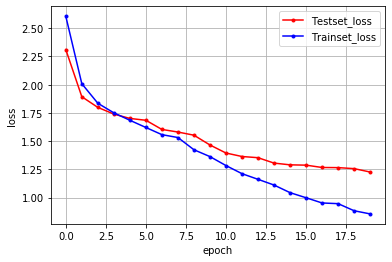

In [0]:
# 그래프로 표현하기
import matplotlib.pyplot as plt 

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.show()

In [0]:
# LSTM과 CNN의 조합을 이용한 영화 리뷰 분류
# 인터넷 영화 데이터베이스(Internet Movie Database, IMDB): 영화와 관련된 정보와 출연진 정보, 개봉 정보, 영화 후기, 평점에 이르기까지 매우 폭넓은 데이터가 저장된 데이터.
# 해당 영화를 긍정/부정으로 평가했는지도 담겨 있음.
import numpy as np
import tensorflow as tf

# seed설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# data load
from keras.datasets import imdb
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words = 5000)

# preprocessiong
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

17465344/17464789 [==============================] - 2s 0us/step


In [0]:
# 모델 설정
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Conv1D, MaxPooling1Dx, Activation

model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding = 'valid', activation = 'relu', strides =1))
model.add(MaxPooling1D(pool_size = 4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
odel.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)               

In [0]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

# 모델 실행
history = model.fit(x_train, Y_train, batch_size = 100, epochs = 5, validation_data=(x_test, Y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, Y_test)[1]))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 22s 892us/step - loss: 0.4585 - acc: 0.7646 - val_loss: 0.3349 - val_acc: 0.8544
Epoch 2/5
25000/25000 [==============================] - 15s 590us/step - loss: 0.2918 - acc: 0.8794 - val_loss: 0.3251 - val_acc: 0.8592
Epoch 3/5
25000/25000 [==============================] - 15s 588us/step - loss: 0.2486 - acc: 0.8988 - val_loss: 0.3306 - val_acc: 0.8566
Epoch 4/5
25000/25000 [==============================] - 16s 630us/step - loss: 0.2130 - acc: 0.9153 - val_loss: 0.3489 - val_acc: 0.8516
Epoch 5/5
25000/25000 [==============================] - 8s 312us/step

 Test Accuracy: 0.8532


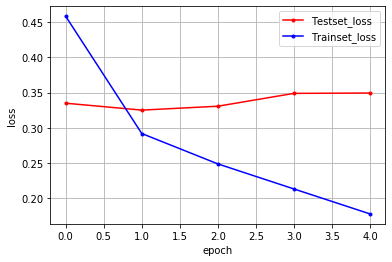

In [0]:
# 그래프로 나타내기
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_vloss))

plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()